# 🎯 Test ImageAnalyzer avec OCR Hybride - Analyse complète SF6

Ce notebook utilise la classe **ImageAnalyzer** avec **TrOCR + EasyOCR** pour analyser automatiquement tous les screenshots SF6.

## ✅ Fonctionnalités complètes

### 🔧 Configuration et chargement
- **Configuration centralisée** : Chargement automatique et réutilisation des ROIs entre notebooks, depuis `rois_config.json`

### 🧠 OCR Hybride intelligent
- **Timer → TrOCR** : Optimisé pour la reconnaissance de chiffres
- **Characters → EasyOCR** : Optimisé pour les noms de personnages
- **Modularité** : Configuration par ROI dans `rois_config.json`

### 🖼️ Traitement d'images optimisé
- **Preprocessing configurable** avec enum PreprocessingStep :
  - `NONE` : Image brute (défaut)
  - `LIGHT` : Preprocessing léger (grayscale + normalisation)
  - `STANDARD` : Preprocessing recommandé (+ CLAHE)
  - `AGGRESSIVE` : Toutes les optimisations
  - Combinaisons personnalisées : `GRAYSCALE | THRESHOLD`

### 📊 Analyse et résultats
- **Sauvegarde automatique** de tous les screenshots dans le répertoire `input/screenshots/`
- **Statistiques détaillées** : Qualité globale (détections complètes vs partielles)
- **Mosaïque visuelle** : Aperçu des résultats annotés

### 🚀 Workflow modulaire
1. **Configuration** : `ROIs_placer.ipynb` → Placement et validation des ROIs
2. **Analyse** : `test-analyze.ipynb` → Traitement en lot avec OCR hybride
3. **Intégration** : Les configurations seront réutilisées dans le pipeline de production

### 🎮 Spécialisation Street Fighter 6
- **Détection timer** : Reconnaissance précise du temps de match
- **Détection personnages** : Noms des combattants P1 vs P2
- **Characters.json** : Liste complète des personnages SF6 pour validation
- **Images annotées** : Vérification visuelle des détections avec bounding boxes

**⚠️ Prérequis :** Configurez d'abord les ROIs avec `ROIs_placer.ipynb` pour créer `rois_config.json`

In [1]:
import sys
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from pathlib import Path

project_root = os.path.abspath('../..')
if project_root not in sys.path:
    sys.path.append(project_root)

from src.image_analyzer import ImageAnalyzer
from src.preprocessing_steps import PreprocessingStep
from src.roi_manager import RoiManager

print("✅ Imports terminés - ImageAnalyzer avec OCR Hybride prêt")
print("🔧 Configuration OCR:")
print("   - Timer → TrOCR (excellent pour chiffres)")
print("   - Characters → EasyOCR (excellent pour noms + whitelist)")
print("📋 Preprocessing disponibles:")
print("   - PreprocessingStep.NONE (aucun preprocessing)")
print("   - PreprocessingStep.MINIMAL (grayscale seulement)")
print("   - PreprocessingStep.LIGHT (grayscale + normalisation)")  
print("   - PreprocessingStep.STANDARD (grayscale + normalisation + CLAHE)")
print("   - PreprocessingStep.AGGRESSIVE (toutes les étapes)")
print("   - Combinaisons: PreprocessingStep.GRAYSCALE | PreprocessingStep.THRESHOLD")

# Initialiser RoiManager et charger les ROIs
print("\n📂 Chargement des ROIs avec RoiManager...")
try:
    roi_manager = RoiManager('../../rois_config.json')
    roi_manager.load()
    
    print("✅ ROIs chargées avec succès")
    print(roi_manager.get_roi_info_summary())
    
    # Obtenir les ROIs au format ImageAnalyzer
    roi_configs = roi_manager.to_image_analyzer_format()
    timer_roi = roi_configs.get('timer')
    character1_roi = roi_configs.get('character1')
    character2_roi = roi_configs.get('character2')
    
    analyzer = ImageAnalyzer(
        timer_roi=timer_roi,
        character1_roi=character1_roi,
        character2_roi=character2_roi,
        config_file='../../rois_config.json', 
        characters_file='../../characters.json',
        debug=True,
        debug_save_dir='../../output/analyzed_frames/'
    )
except Exception as e:
    print(f"❌ Erreur: {e}")
    print("💡 Utilisez ROIs_placer.ipynb pour configurer les ROIs")
    roi_manager = None
    analyzer = None

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


✅ Imports terminés - ImageAnalyzer avec OCR Hybride prêt
🔧 Configuration OCR:
   - Timer → TrOCR (excellent pour chiffres)
   - Characters → EasyOCR (excellent pour noms + whitelist)
📋 Preprocessing disponibles:
   - PreprocessingStep.NONE (aucun preprocessing)
   - PreprocessingStep.MINIMAL (grayscale seulement)
   - PreprocessingStep.LIGHT (grayscale + normalisation)
   - PreprocessingStep.STANDARD (grayscale + normalisation + CLAHE)
   - PreprocessingStep.AGGRESSIVE (toutes les étapes)
   - Combinaisons: PreprocessingStep.GRAYSCALE | PreprocessingStep.THRESHOLD

📂 Chargement des ROIs avec RoiManager...
✅ ROIs chargées avec succès
Configuration: ../../rois_config.json
ROIs disponibles: 3
  - TIMER (timer): 0.460,0.040 → 0.540,0.180 [ocr]
  - PLAYER 1 (character1): 0.000,0.020 → 0.100,0.150 [ocr]
  - PLAYER 2 (character2): 0.900,0.019 → 1.000,0.150 [ocr]
[ImageAnalyzer] ✅ Loaded 26 character names from ../../characters.json
[ImageAnalyzer] ✅ Loaded 3 ROI configurations from ../../rois

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using CPU. Note: This module is much faster with a GPU.


[ImageAnalyzer] ✅ TrOCR chargé avec succès
[ImageAnalyzer] 🔄 Chargement de EasyOCR...
[ImageAnalyzer] ✅ EasyOCR chargé avec succès
[ImageAnalyzer] Statut OCR - TrOCR: ✅, EasyOCR: ✅


## 1. 📂 Chargement des ROIs et image de référence

🔄 Vérification des screenshots...
✨ 72 screenshots détectés pour analyse

🎯 Image de référence: 20250806194053_1.jpg
👁️ Prévisualisation des ROIs sur l'image de référence:


/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


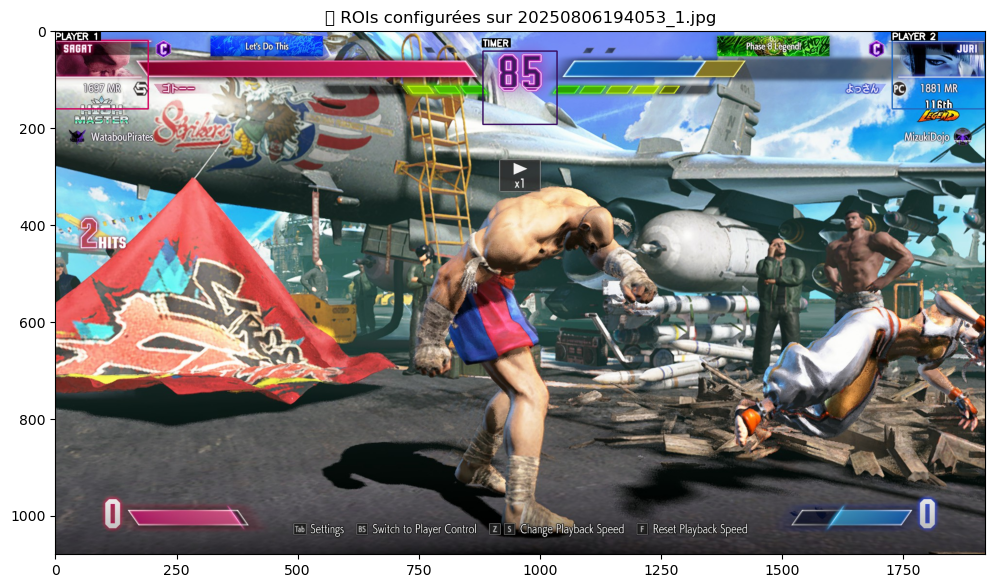

✅ Configuration complète et valide!
➡️ Vous pouvez maintenant exécuter l'analyse complète.


In [2]:
SCREENSHOTS_DIR = '../../input/screenshots/'
OUTPUT_DIR = '../../output/analyzed_frames/'
os.makedirs(OUTPUT_DIR, exist_ok=True)

def get_screenshot_paths(screenshots_dir):
    """Liste tous les chemins des screenshots depuis le répertoire"""
    screenshots_path = Path(screenshots_dir)
    
    if not screenshots_path.exists():
        raise FileNotFoundError(f"❌ Répertoire non trouvé: {screenshots_dir}")
    
    # Extensions d'images supportées
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp']
    image_files = []
    
    for ext in extensions:
        image_files.extend(screenshots_path.glob(ext))
        image_files.extend(screenshots_path.glob(ext.upper()))
    
    return sorted(image_files)

def load_screenshots_generator(screenshots_dir):
    """Générateur qui yield les images une par une pour économiser la RAM"""
    image_files = get_screenshot_paths(screenshots_dir)
    
    print(f"📁 Répertoire: {screenshots_dir}")
    print(f"🖼️  Screenshots trouvés: {len(image_files)}")
    
    if len(image_files) == 0:
        print(f"⚠️  Aucune image trouvée. Contenu du répertoire:")
        try:
            screenshots_path = Path(screenshots_dir)
            for item in screenshots_path.iterdir():
                print(f"   - {item.name}")
        except:
            print("   (impossible de lister le contenu)")
        return
    
    # Yield les images une par une
    for img_path in image_files:
        img = cv.imread(str(img_path))
        if img is not None:
            print(f"  ✅ {img_path.name} - {img.shape[1]}x{img.shape[0]}")
            yield (str(img_path), img)
        else:
            print(f"  ❌ Impossible de charger: {img_path.name}")

# Compter le nombre total d'images (pour les statistiques)
print("🔄 Vérification des screenshots...")
screenshot_paths = get_screenshot_paths(SCREENSHOTS_DIR)
total_screenshots = len(screenshot_paths)

if total_screenshots == 0:
    print("❌ Aucun screenshot trouvé")
    raise FileNotFoundError("Aucune image disponible")

print(f"✨ {total_screenshots} screenshots détectés pour analyse")

# Image de référence avec prévisualisation des ROIs
if screenshot_paths and roi_manager is not None:
    reference_path = str(screenshot_paths[0])
    reference_img = cv.imread(reference_path)
    print(f"\n🎯 Image de référence: {Path(reference_path).name}")

    # Prévisualisation des ROIs avec RoiManager
    print("👁️ Prévisualisation des ROIs sur l'image de référence:")
    
    preview_img = roi_manager.preview_rois_on_image(reference_img, show_labels=True)
    
    plt.figure(figsize=(12, 8))
    plt.imshow(cv.cvtColor(preview_img, cv.COLOR_BGR2RGB))
    plt.title(f"🎯 ROIs configurées sur {Path(reference_path).name}")
    plt.axis('on')
    plt.show()
    
    # Vérifications
    is_complete, missing = roi_manager.check_completeness()
    is_valid, errors = roi_manager.validate_all_rois()
    
    if is_complete and is_valid:
        print("✅ Configuration complète et valide!")
        print("➡️ Vous pouvez maintenant exécuter l'analyse complète.")
    elif not is_complete:
        print(f"❌ ROIs manquantes: {', '.join(missing)}")
        print("💡 Utilisez ROIs_placer.ipynb pour configurer toutes les ROIs")
    elif not is_valid:
        print("❌ Erreurs de validation:")
        for error in errors:
            print(f"   - {error}")
        print("💡 Utilisez ROIs_placer.ipynb pour corriger les ROIs")
        
elif roi_manager is None:
    print("❌ Impossible de charger les ROIs depuis rois_config.json")
    print("💡 Utilisez ROIs_placer.ipynb pour créer la configuration")
else:
    print("❌ Aucune image de référence disponible")

## 2. 🚀 Analyse complète

In [3]:
# Analyse complète avec ImageAnalyzer + TrOCR + EasyOCR
if analyzer is None or roi_manager is None:
    raise RuntimeError("❌ ImageAnalyzer ou RoiManager non configuré. Vérifiez le chargement des ROIs dans la cellule précédente")

# Vérifier que toutes les ROIs sont configurées
is_complete, missing = roi_manager.check_completeness()

if not is_complete:
    raise RuntimeError(f"❌ ROIs manquantes: {', '.join(missing)}. Utilisez ROIs_placer.ipynb pour configurer toutes les ROIs")

print("🚀 Démarrage de l'analyse complète avec OCR hybride")
print(f"📊 Configuration:")
print(f"   Screenshots à traiter: {total_screenshots}")
print(f"   Répertoire de sortie: {OUTPUT_DIR}")
print(f"   ROIs: {', '.join(roi_manager.get_roi_names())}")

# Afficher la configuration hybride
print(f"\n🔧 Configuration OCR hybride:")
for roi_name in roi_manager.get_roi_names():
    roi_config = roi_manager.get_roi(roi_name)
    if roi_config:
        model = roi_config.get('model', 'trocr')
        print(f"   - {roi_config['label']} → {model.upper()}")

# Configuration du preprocessing - Tu peux changer ici !
# Choix disponibles:
# - PreprocessingStep.NONE = Aucun preprocessing (image brute)
# - PreprocessingStep.LIGHT = Preprocessing léger
# - PreprocessingStep.STANDARD = Preprocessing recommandé
# - PreprocessingStep.GRAYSCALE | PreprocessingStep.THRESHOLD = Combinaison personnalisée

preprocessing_choice = PreprocessingStep.NONE  # 🔧 CHANGEZ ICI POUR TESTER
print(f"\n🔧 Preprocessing choisi: {preprocessing_choice}")

# Analyser tous les screenshots avec le générateur
print("\n🔄 Analyse en cours...")
print("=" * 60)

all_results = []
successful_analyses = 0
failed_analyses = 0

# Compteurs pour les modèles OCR
trocr_calls = 0
easyocr_calls = 0

# Utiliser le générateur pour économiser la RAM
for i, (img_path, img) in enumerate(load_screenshots_generator(SCREENSHOTS_DIR)):
    img_name = Path(img_path).name
    print(f"\n📸 {i+1:3d}/{total_screenshots} - {img_name}")
    
    try:
        # Analyser l'image avec ImageAnalyzer et preprocessing choisi
        # ImageAnalyzer sauvegarde automatiquement l'image annotée en mode debug
        results = analyzer.analyze_frame(
            img, 
            rois_to_analyze=['timer', 'character1', 'character2'],
            preprocessing=preprocessing_choice  # 🔧 Utilisation de l'enum
        )
        
        print(f"   Timer: '{results.get('timer', 'N/A')}'")
        print(f"   Character1: '{results.get('character1', 'N/A')}'")
        print(f"   Character2: '{results.get('character2', 'N/A')}'")
        
        # Compter les appels aux modèles OCR basé sur les ROIs analysées et leur config
        for roi_name in ['timer', 'character1', 'character2']:
            roi_config = roi_manager.get_roi(roi_name)
            if roi_config:
                model = roi_config.get('model', 'trocr')
                if model.lower() == 'trocr':
                    trocr_calls += 1
                elif model.lower() == 'easyocr':
                    easyocr_calls += 1
        
        # Construire le chemin complet de l'image debug à partir du nom de fichier
        debug_filename = results.get('debug_image_filename')
        if debug_filename:
            output_path = os.path.join(OUTPUT_DIR, debug_filename)
        else:
            output_path = None
        
        # Stocker les résultats avec le chemin complet de l'image debug 
        result_data = {
            'filename': img_name,
            'timer': results.get('timer', ''),
            'character1': results.get('character1', ''),
            'character2': results.get('character2', ''),
            'output_path': output_path,  # ✅ Chemin complet reconstruit 
            'success': True,
            'preprocessing': str(preprocessing_choice)
        }
        all_results.append(result_data)
        successful_analyses += 1
        
        print(f"   ✅ Analyse terminée (image sauvée automatiquement par ImageAnalyzer)")
        
    except Exception as e:
        print(f"   ❌ Erreur: {str(e)}")
        failed_analyses += 1
        
        result_data = {
            'filename': img_name,
            'timer': 'ERROR',
            'character1': 'ERROR', 
            'character2': 'ERROR',
            'output_path': None,
            'success': False,
            'error': str(e),
            'preprocessing': str(preprocessing_choice)
        }
        all_results.append(result_data)

# Résumé statistique
print(f"\n" + "=" * 60)
print(f"📊 RÉSUMÉ DE L'ANALYSE HYBRIDE")
print(f"   Preprocessing utilisé: {preprocessing_choice}")
print(f"   Images traitées: {total_screenshots}")
print(f"   Succès: {successful_analyses}")
print(f"   Échecs: {failed_analyses}")
print(f"   Taux de succès: {successful_analyses/total_screenshots*100:.1f}%")

# Statistiques des appels aux modèles OCR
print(f"\n🧠 Appels aux modèles OCR:")
print(f"   TrOCR: {trocr_calls} appels")
print(f"   EasyOCR: {easyocr_calls} appels")
print(f"   Total: {trocr_calls + easyocr_calls} appels")

if successful_analyses > 0:
    # Valeurs uniques détectées
    successful_results = [r for r in all_results if r['success']]
    unique_timers = list(set([r['timer'] for r in successful_results if r['timer'] and r['timer'] != '']))
    unique_char1 = list(set([r['character1'] for r in successful_results if r['character1'] and r['character1'] != '']))
    unique_char2 = list(set([r['character2'] for r in successful_results if r['character2'] and r['character2'] != '']))
    
    if unique_timers:
        unique_timers.sort()
        print(f"\n🎯 Valeurs détectées:")
        print(f"   Timers: {', '.join(unique_timers)}")
    if unique_char1:
        print(f"   Characters 1: {', '.join(unique_char1[:10])}{'...' if len(unique_char1) > 10 else ''}")
    if unique_char2:
        print(f"   Characters 2: {', '.join(unique_char2[:10])}{'...' if len(unique_char2) > 10 else ''}")

print(f"\n💾 Résultats sauvegardés automatiquement dans: {OUTPUT_DIR}")
print(f"🔍 Images annotées générées par ImageAnalyzer")

# 💡 Instructions pour tester d'autres preprocessings
print(f"\n💡 POUR TESTER D'AUTRES PREPROCESSINGS:")
print(f"   Changez 'preprocessing_choice' ligne 23 de cette cellule:")
print(f"   - PreprocessingStep.NONE (actuel)")
print(f"   - PreprocessingStep.LIGHT") 
print(f"   - PreprocessingStep.STANDARD")
print(f"   - PreprocessingStep.GRAYSCALE | PreprocessingStep.THRESHOLD")

🚀 Démarrage de l'analyse complète avec OCR hybride
📊 Configuration:
   Screenshots à traiter: 72
   Répertoire de sortie: ../../output/analyzed_frames/
   ROIs: timer, character1, character2

🔧 Configuration OCR hybride:
   - TIMER → TROCR
   - PLAYER 1 → EASYOCR
   - PLAYER 2 → EASYOCR

🔧 Preprocessing choisi: NONE

🔄 Analyse en cours...
📁 Répertoire: ../../input/screenshots/
🖼️  Screenshots trouvés: 72
  ✅ 20250806194053_1.jpg - 1920x1080

📸   1/72 - 20250806194053_1.jpg
[ImageAnalyzer] ⬜ ROI timer extracted: 153x151 with boundaries=(883, 43, 1036, 194)
[ImageAnalyzer] 📝 ROI 'timer' uses OCR processing with model: trocr
[ImageConverter] enhance_for_ocr: input_shape=(151, 153, 3)
[ImageConverter] 🚫 No preprocessing (NONE) - returning original image
[ImageAnalyzer] 🔍 Enhanced image for 'timer' ready for TROCR
[ImageAnalyzer] _extract_timer_digits: processing image shape (151, 153, 3)
[ImageAnalyzer] 🔄 Utilisation de TrOCR pour détection timer
[ImageAnalyzer] TrOCR brut: 'A85' -> digits

## 3. 🖼️ Mosaïque des résultats

🖼️ MOSAÏQUE DES RÉSULTATS
📊 Images annotées disponibles: 72
🎲 Affichage d'un échantillon aléatoire de 15 images
📁 Dossier des images debug: ../../output/analyzed_frames/


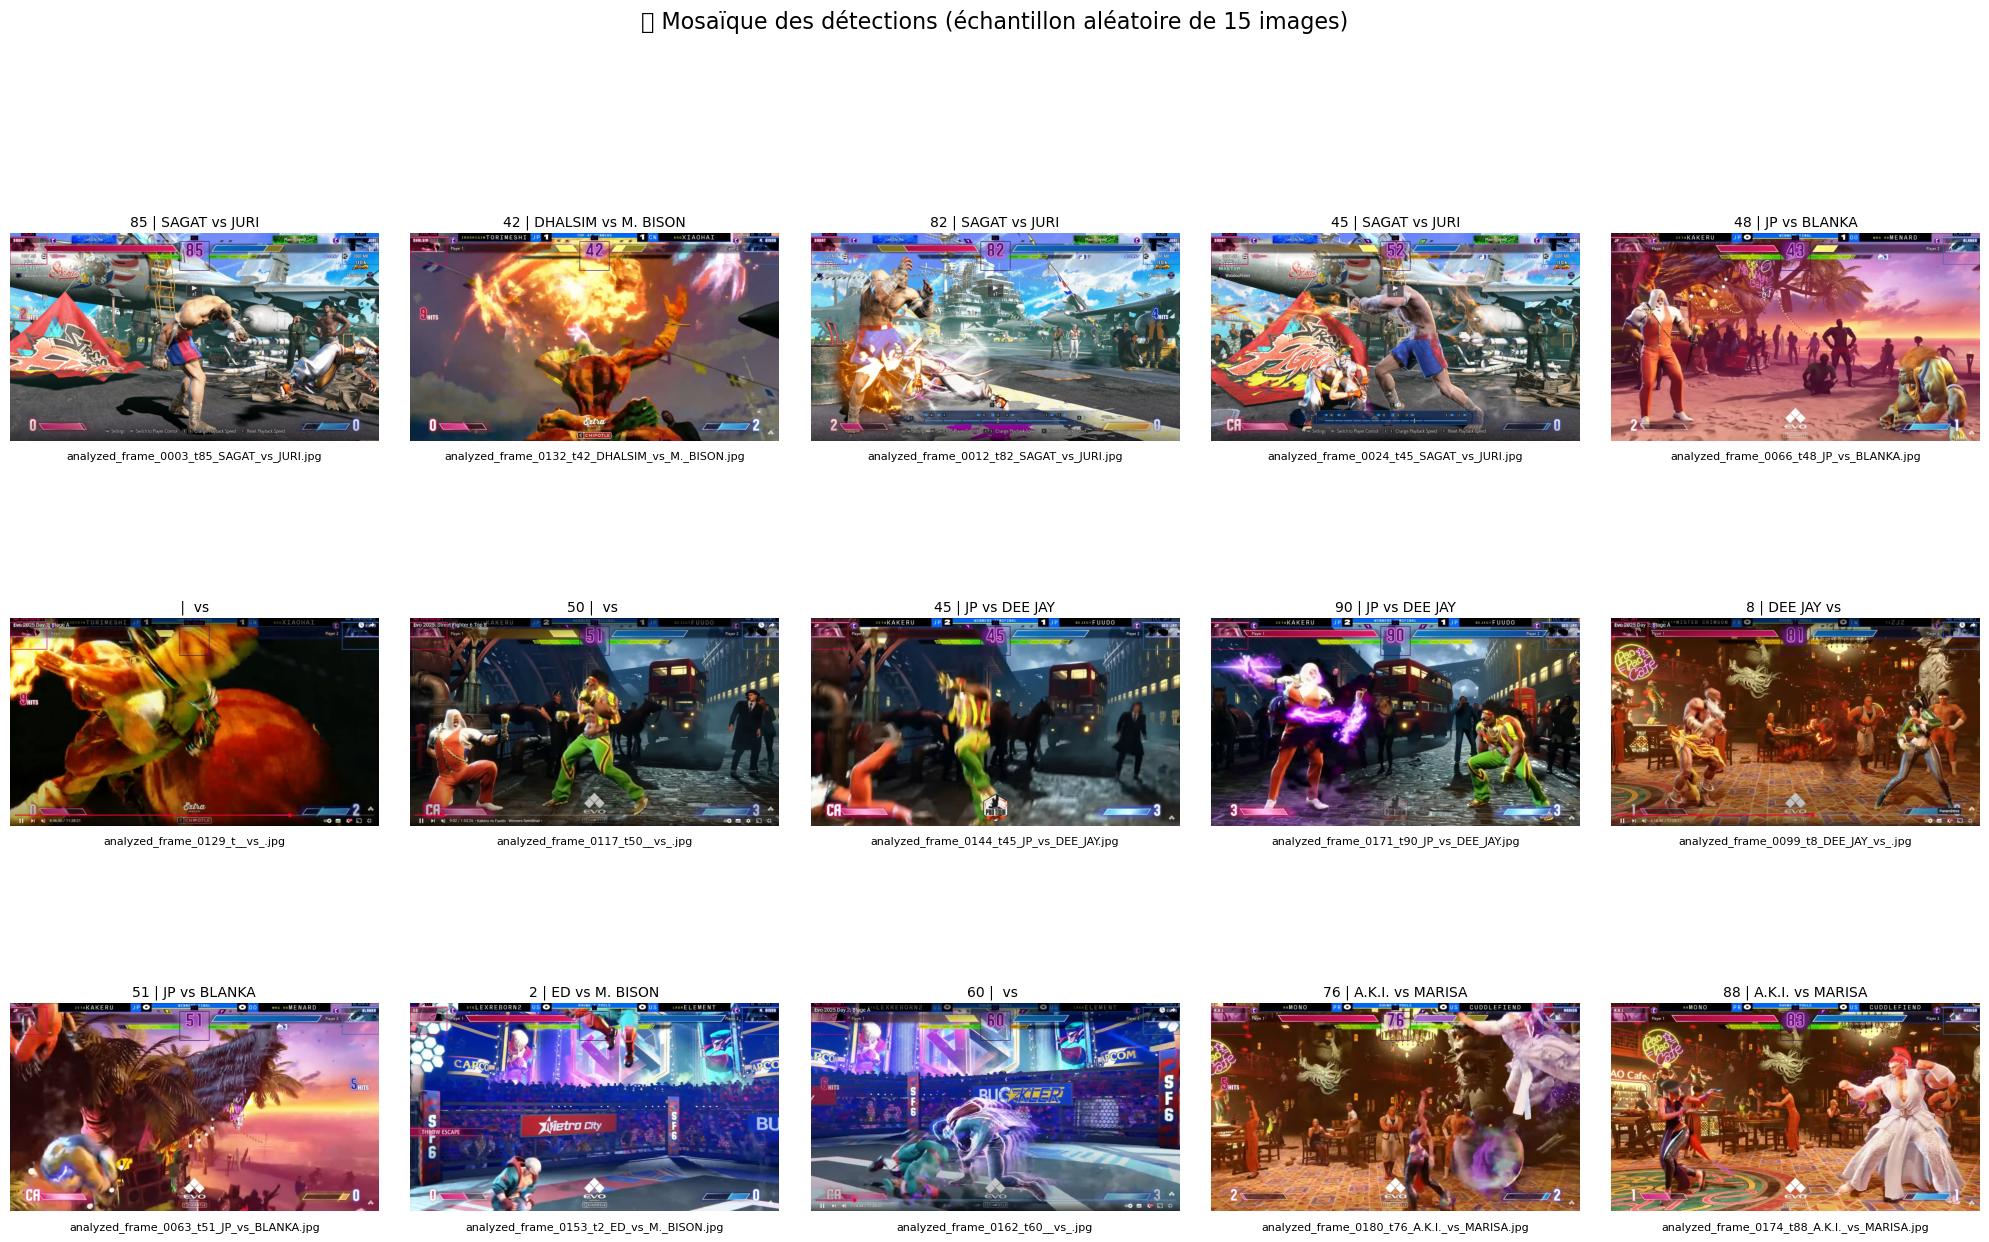

✨ Mosaïque affichée avec 15 images sélectionnées aléatoirement
🔄 Ré-exécutez cette cellule pour voir un échantillon différent


In [4]:
# Mosaïque des résultats avec échantillonnage aléatoire
import random

if 'all_results' not in locals() or not all_results:
    raise RuntimeError("❌ Aucune donnée d'analyse disponible. Exécutez d'abord l'analyse complète")

print("🖼️ MOSAÏQUE DES RÉSULTATS")
print("=" * 60)

# Filtrer les résultats avec image pour la mosaïque  
results_with_images = [r for r in all_results if r['success'] and r.get('output_path') and os.path.exists(r['output_path'])]

if len(results_with_images) == 0:
    print("❌ Aucun résultat avec image à afficher")
    print("🔍 Vérification des résultats disponibles:")
    for i, result in enumerate(all_results[:3]):  # Montrer les 3 premiers
        print(f"   {i+1}. success={result.get('success')}, output_path={result.get('output_path')}")
        if result.get('output_path'):
            exists = os.path.exists(result['output_path'])
            print(f"      fichier existe: {exists}")
    raise RuntimeError("❌ Aucun résultat avec image à afficher")

print(f"📊 Images annotées disponibles: {len(results_with_images)}")

# Échantillonnage aléatoire des images à afficher
num_images_to_show = min(15, len(results_with_images))
sampled_results = random.sample(results_with_images, num_images_to_show)

print(f"🎲 Affichage d'un échantillon aléatoire de {num_images_to_show} images")
print(f"📁 Dossier des images debug: {OUTPUT_DIR}")

# Configuration de la grille d'affichage
cols = 5
rows = (num_images_to_show + cols - 1) // cols

plt.figure(figsize=(20, 5 * rows))  # Augmenté la hauteur pour les labels

for i, result in enumerate(sampled_results):
    plt.subplot(rows, cols, i + 1)
    
    # Charger l'image annotée générée par ImageAnalyzer
    debug_path = result['output_path']  # Chemin complet reconstruit dans cellule 5
    annotated_img = cv.imread(debug_path)
    
    if annotated_img is not None:
        # Conversion BGR vers RGB pour matplotlib
        annotated_img_rgb = cv.cvtColor(annotated_img, cv.COLOR_BGR2RGB)
        
        plt.imshow(annotated_img_rgb)
        
        # Titre avec informations de détection (au-dessus)
        timer = result.get('timer', 'N/A')
        char1 = result.get('character1', 'N/A')
        char2 = result.get('character2', 'N/A')
        
        title = f"{timer} | {char1} vs {char2}"
        if len(title) > 25:
            title = title[:22] + "..."
            
        plt.title(title, fontsize=10, pad=5)
        
    else:
        plt.text(0.5, 0.5, f"❌ Erreur\nchargement\n{os.path.basename(debug_path)}", 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title(f"Erreur: {result['filename']}", fontsize=10)
    
    plt.axis('off')
    
    # Nom du fichier debug en dessous de l'image (extrait du chemin de l'image)
    debug_filename = os.path.basename(debug_path) if debug_path else result.get('filename', 'N/A')
    
    # Placer le texte en dessous de l'image
    plt.text(0.5, -0.05, debug_filename, transform=plt.gca().transAxes, 
            fontsize=8, ha='center', va='top', color='black')

plt.tight_layout()
plt.suptitle(f"🎯 Mosaïque des détections (échantillon aléatoire de {num_images_to_show} images)", 
             fontsize=16, y=0.98)
plt.subplots_adjust(top=0.93, bottom=0.08)  # Ajuster l'espacement pour les noms de fichiers
plt.show()

print(f"✨ Mosaïque affichée avec {num_images_to_show} images sélectionnées aléatoirement")
print(f"🔄 Ré-exécutez cette cellule pour voir un échantillon différent")

## 4. 📊 Analyse des performances

In [5]:
# Analyse des performances par ROI
if 'all_results' not in locals() or not all_results:
    raise RuntimeError("❌ Aucune donnée d'analyse disponible. Exécutez d'abord l'analyse complète")

print("📊 ANALYSE DES PERFORMANCES")
print("=" * 60)

successful_results = [r for r in all_results if r['success']]
total_successful = len(successful_results)

if total_successful == 0:
    raise RuntimeError("❌ Aucune analyse réussie à analyser")

# Taux de détection par ROI
timer_detected = len([r for r in successful_results if r['timer'] and r['timer'].strip() != ''])
char1_detected = len([r for r in successful_results if r['character1'] and r['character1'].strip() != ''])
char2_detected = len([r for r in successful_results if r['character2'] and r['character2'].strip() != ''])

print(f"🎯 Taux de détection par ROI:")
print(f"   Timer: {timer_detected}/{total_successful} ({timer_detected/total_successful*100:.1f}%)")
print(f"   Character1: {char1_detected}/{total_successful} ({char1_detected/total_successful*100:.1f}%)")
print(f"   Character2: {char2_detected}/{total_successful} ({char2_detected/total_successful*100:.1f}%)")

# Qualité globale des détections
complete_detections = len([r for r in successful_results 
                          if r['timer'] and r['timer'].strip() != '' and 
                             r['character1'] and r['character1'].strip() != '' and
                             r['character2'] and r['character2'].strip() != ''])

partial_detections = total_successful - complete_detections

print(f"\n🔍 Qualité des détections:")
print(f"   Détections complètes (3 ROIs): {complete_detections}/{total_successful} ({complete_detections/total_successful*100:.1f}%)")
print(f"   Détections partielles: {partial_detections}/{total_successful} ({partial_detections/total_successful*100:.1f}%)")

# Statistiques des noms de personnages
char1_values = [r['character1'] for r in successful_results if r['character1'] and r['character1'].strip() != '']
char2_values = [r['character2'] for r in successful_results if r['character2'] and r['character2'].strip() != '']

if char1_values:
    avg_char1_length = sum(len(name) for name in char1_values) / len(char1_values)
    print(f"\n📏 Statistiques des noms:")
    print(f"   Longueur moyenne P1: {avg_char1_length:.1f} caractères")

if char2_values:
    if not char1_values:
        print(f"\n📏 Statistiques des noms:")
    avg_char2_length = sum(len(name) for name in char2_values) / len(char2_values)
    print(f"   Longueur moyenne P2: {avg_char2_length:.1f} caractères")

📊 ANALYSE DES PERFORMANCES
🎯 Taux de détection par ROI:
   Timer: 68/72 (94.4%)
   Character1: 61/72 (84.7%)
   Character2: 59/72 (81.9%)

🔍 Qualité des détections:
   Détections complètes (3 ROIs): 56/72 (77.8%)
   Détections partielles: 16/72 (22.2%)

📏 Statistiques des noms:
   Longueur moyenne P1: 4.6 caractères
   Longueur moyenne P2: 5.8 caractères
